In [1]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tqdm import tqdm
from skimage.io import imshow
from keras.utils import np_utils
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras.utils import img_to_array
from tensorflow.keras import layers, models
from keras.utils import np_utils
from imutils import paths
import random
import os

In [2]:
#Endereçõ do diretorio do Dataset
path_dataset = "D:\Projetos\Projetos academicos\Pokemon identifyier\database\dataset"

#Carrega a lista de labels
label_dict = {}
for i, d in enumerate(sorted(os.listdir(path_dataset))):
    label_dict[d] = i

print(label_dict)

#Calcula a quantidade de classes
num_classes = len(label_dict)

data = []

{'Abra': 0, 'Aerodactyl': 1, 'Alakazam': 2, 'Arbok': 3, 'Arcanine': 4, 'Articuno': 5, 'Beedrill': 6, 'Bellsprout': 7, 'Blastoise': 8, 'Bulbasaur': 9, 'Butterfree': 10, 'Caterpie': 11, 'Chansey': 12, 'Charizard': 13, 'Charmander': 14, 'Charmeleon': 15, 'Clefable': 16, 'Clefairy': 17, 'Cloyster': 18, 'Cubone': 19, 'Dewgong': 20, 'Diglett': 21, 'Ditto': 22, 'Dodrio': 23, 'Doduo': 24, 'Dragonair': 25, 'Dragonite': 26, 'Dratini': 27, 'Drowzee': 28, 'Dugtrio': 29, 'Eevee': 30, 'Ekans': 31, 'Electabuzz': 32, 'Electrode': 33, 'Exeggcute': 34, 'Exeggutor': 35, 'Farfetchd': 36, 'Fearow': 37, 'Flareon': 38, 'Gastly': 39, 'Gengar': 40, 'Geodude': 41, 'Gloom': 42, 'Golbat': 43, 'Goldeen': 44, 'Golduck': 45, 'Golem': 46, 'Graveler': 47, 'Grimer': 48, 'Growlithe': 49, 'Gyarados': 50, 'Haunter': 51, 'Hitmonchan': 52, 'Hitmonlee': 53, 'Horsea': 54, 'Hypno': 55, 'Ivysaur': 56, 'Jigglypuff': 57, 'Jolteon': 58, 'Jynx': 59, 'Kabuto': 60, 'Kabutops': 61, 'Kadabra': 62, 'Kakuna': 63, 'Kangaskhan': 64, 'Kingl

In [ ]:
# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(path_dataset)))
random.seed(42)
random.shuffle(imagePaths)
print(imagePaths)

In [4]:
labels = []

print("[INFO] loading images...")
# loop over the input images
for imagePath in tqdm(imagePaths):
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (32, 32))
    #Converts Image instance to a Numpy array
    image = img_to_array(image)
    data.append(image)

    # extract the class label from the image path and update the
    # labels list
    label = label_dict[imagePath.split(os.path.sep)[-2]]
    labels.append(label)

[INFO] loading images...


100%|██████████| 21314/21314 [10:48<00:00, 32.86it/s] 


In [5]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(train_images, test_images, train_l, test_l) = train_test_split( data, labels, test_size=0.25, random_state=42)

# convert the labels from integers to vectors
train_labels = np_utils.to_categorical(train_l, num_classes=num_classes)
test_labels = np_utils.to_categorical(test_l, num_classes=num_classes)

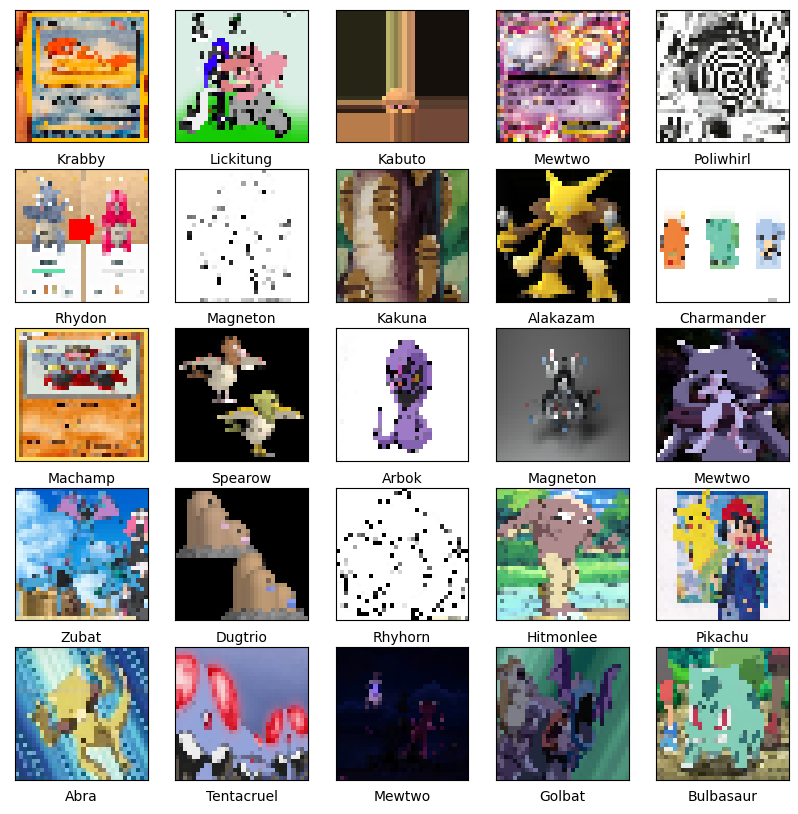

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img_float32 = np.float32(train_images[i])
    plt.imshow(cv2.cvtColor(img_float32, cv2.COLOR_BGR2RGB) )
    # labels
    plt.xlabel( [k for k, v in label_dict.items() if v == train_l[i]][0] )
plt.show()

In [7]:
data.shape

(21314, 32, 32, 3)

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 256)       147712    
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 256)       590080    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 256)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 128)         2

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_l, epochs=10, batch_size=1000,
                    validation_data=(test_images, test_l))

Epoch 1/10
16/16 [==============================] - 62s 4s/step - loss: 3.5028 - accuracy: 0.3732 - val_loss: 2.5133 - val_accuracy: 0.4282
Epoch 2/10
16/16 [==============================] - 61s 4s/step - loss: 1.7284 - accuracy: 0.5311 - val_loss: 1.6915 - val_accuracy: 0.6592
Epoch 3/10
16/16 [==============================] - 63s 4s/step - loss: 0.8652 - accuracy: 0.7376 - val_loss: 1.4839 - val_accuracy: 0.7690
Epoch 4/10
16/16 [==============================] - 64s 4s/step - loss: 0.5418 - accuracy: 0.8275 - val_loss: 1.5278 - val_accuracy: 0.7928
Epoch 5/10
16/16 [==============================] - 62s 4s/step - loss: 0.4430 - accuracy: 0.8535 - val_loss: 1.4920 - val_accuracy: 0.8003
Epoch 6/10
16/16 [==============================] - 62s 4s/step - loss: 0.4014 - accuracy: 0.8673 - val_loss: 1.5127 - val_accuracy: 0.8048
Epoch 7/10
16/16 [==============================] - 63s 4s/step - loss: 0.3883 - accuracy: 0.8699 - val_loss: 1.5943 - val_accuracy: 0.8043
Epoch 8/10
16/16 [==

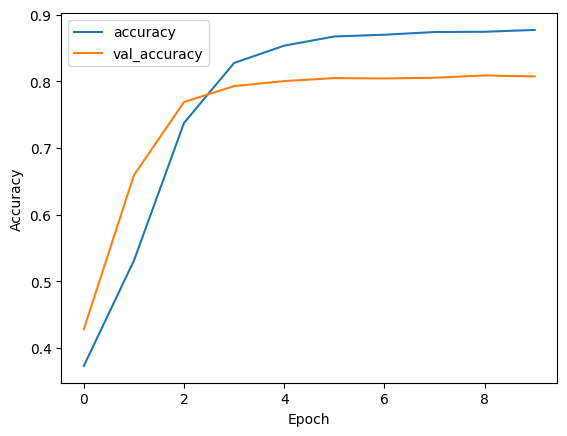

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

In [16]:
print("Generating test predictions...")
predict_x=model.predict(test_images)
print(np.around(predict_x, 2))

# make class predictions
predictions = (predict_x > 0.5).astype(int)

y_pred_class = np.argmax(predictions, axis=1)
y_test_class = np.argmax(test_labels, axis=1)

for i in range(len(test_labels)):
	if y_pred_class[i] == y_test_class[i]:
		print(f'\033[92m {y_pred_class[i]} (expected {y_test_class[i]})')
	else:
		print(f'\033[91m {y_pred_class[i]} (expected {y_test_class[i]})')

Generating test predictions...
167/167 [==============================] - 6s 35ms/step
[[0.   0.   0.   ... 0.03 0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.04 ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]]
 0 (expected 129)
 125 (expected 125)
 37 (expected 37)
 100 (expected 100)
 101 (expected 101)
 14 (expected 14)
 109 (expected 109)
 13 (expected 13)
 15 (expected 15)
 140 (expected 140)
 38 (expected 74)
 47 (expected 41)
 75 (expected 75)
 18 (expected 82)
 82 (expected 82)
 7 (expected 7)
 43 (expected 43)
 108 (expected 108)
 14 (expected 14)
 34 (expected 34)
 107 (expected 107)
 111 (expected 111)
 124 (expected 124)
 137 (expected 137)
 40 (expected 40)
 12 (expected 12)
 119 (expected 119)
 143 (expected 143)
 73 (expected 73)
 41 (expected 130)
 108 (expected 108)
 0 (expected 51)
 18 (expected 18)
 0 (expected 21)
 66 (expected 66)
 14 (expected 14)
 101 (expected

In [17]:
# Avaliando a acurácia com as imagens de Teste
l = len(y_test_class)
acc = sum([y_pred_class[i]==y_test_class[i] for i in range(l)])/l
print('Accuracy: %.2f %%' % (acc*100))

Accuracy: 79.04 %


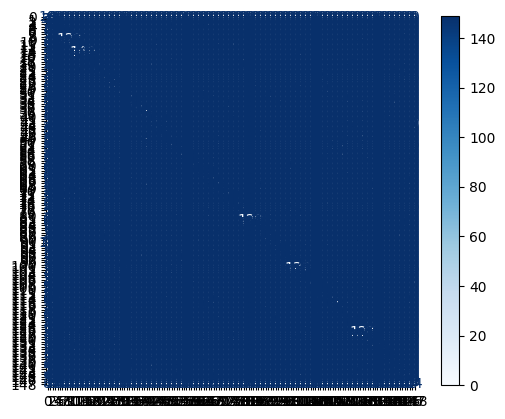

In [22]:
# voltando pro formato de classes
y_pred = np.argmax(predictions, axis=1)
y_test_c = np.argmax(test_labels, axis=1)

#Confusion Matrix
cm = confusion_matrix(y_test_c, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)

In [25]:
model.save('D:\Projetos\Projetos academicos\Pokemon identifyier\base criada')

InvalidArgumentError: Failed to create a directory: D:\Projetos\Projetos academicos/Pokemon identifyierase criada; Invalid argument

In [24]:
print(cm)

[[18  0  0 ...  0  0  0]
 [ 2 37  0 ...  0  0  0]
 [ 3  0 14 ...  0  0  0]
 ...
 [ 3  0  0 ... 26  0  0]
 [ 3  0  0 ...  0 20  0]
 [ 8  2  0 ...  0  0 14]]
